<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/01-Mi-segundo-modelo-Plantilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Mi segundo modelo
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Nombre y Apellido &bull; Fecha
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este cuaderno está diseñado practicar en el entrenamiento y evaluación de un modelo de regresión lineal utilizando datos reales. Los objetivos principales son:

- Entrenar un modelo de regresión lineal.
- Evaluar el ajuste del modelo.


Del conjunto de datos disponible [aquí](https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv), se desea predecir la variable `price` en función de las variables `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`.

In [25]:
# Paquetes necesarios
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import (
    MaxAbsScaler, MinMaxScaler, RobustScaler,
    StandardScaler, Normalizer, QuantileTransformer,
    PowerTransformer
)
from sklearn.metrics import mean_squared_error
import numpy as np

---
## <font color='264CC7'> Lectura de Datos </font>


Realiza la lectura de los datos y presenta las primeras filas del conjunto de datos.

In [5]:
# Leer los datos desde el link proporcionado
url = "https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv"
df = pd.read_csv(url)

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Realiza un escalado de los datos, prueba diferentes técnicas y selecciona la que mejor se ajuste a los datos.

In [6]:
# Selección de variables
X = df[["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors"]]

# -----------------------------
# 1) Normalización por el máximo
# -----------------------------
x_max = X.max()
X_max_normalized = X / x_max

print("Normalización por el máximo:\n")
display(X_max_normalized.head())


# -----------------------------
# 2) Normalización Min-Max
# -----------------------------
min_max_scaler = MinMaxScaler()
X_min_max_normalized = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)

print("Normalización Min-Max:\n")
display(X_min_max_normalized.head())


# -----------------------------
# 3) Estandarización (Z-score)
# -----------------------------
standard_scaler = StandardScaler()
X_standardized = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)

print("Estandarización:\n")
display(X_standardized.head())


Normalización por el máximo:



,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,0.090909,0.12500,0.087149,0.003421,0.285714
1,0.090909,0.28125,0.189808,0.004385,0.571429
2,0.060606,0.12500,0.056869,0.006056,0.285714
3,0.121212,0.37500,0.144756,0.003028,0.285714
4,0.090909,0.25000,0.124077,0.004893,0.285714


Normalización Min-Max:



,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,0.090909,0.12500,0.067170,0.003108,0.0
1,0.090909,0.28125,0.172075,0.004072,0.4
2,0.060606,0.12500,0.036226,0.005743,0.0
3,0.121212,0.37500,0.126038,0.002714,0.0
4,0.090909,0.25000,0.104906,0.004579,0.0


Estandarización:



,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427
1,-0.398737,0.175607,0.533634,-0.189885,0.936506
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427


---
## <font color='264CC7'> Características y etiquetas </font>

Separa las características y las etiquetas y mostrar la dimensión de cada elemento.

In [7]:
# Usaremos los datos estandarizados creados en el paso anterior
X = X_standardized  # características
y = df["price"]     # etiqueta a predecir

# Mostrar dimensiones
print("Dimensión de X (características):", X.shape)
print("Dimensión de y (etiqueta):", y.shape)

Dimensión de X (características): (21613, 5)
Dimensión de y (etiqueta): (21613,)


---
## <font color='264CC7'> Conjunto de entrenamiento y prueba </font>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

In [27]:
# Mi numero de cedula termina en: 82831
random_state = 1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=random_state
)

print("Dimensión de X_train:", X_train.shape)
print("Dimensión de X_test:", X_test.shape)
print("Dimensión de y_train:", y_train.shape)
print("Dimensión de y_test:", y_test.shape)

Dimensión de X_train: (15129, 5)
Dimensión de X_test: (6484, 5)
Dimensión de y_train: (15129,)
Dimensión de y_test: (6484,)


Revisa la distribución de las etiquetas en los conjuntos de entrenamiento y prueba.

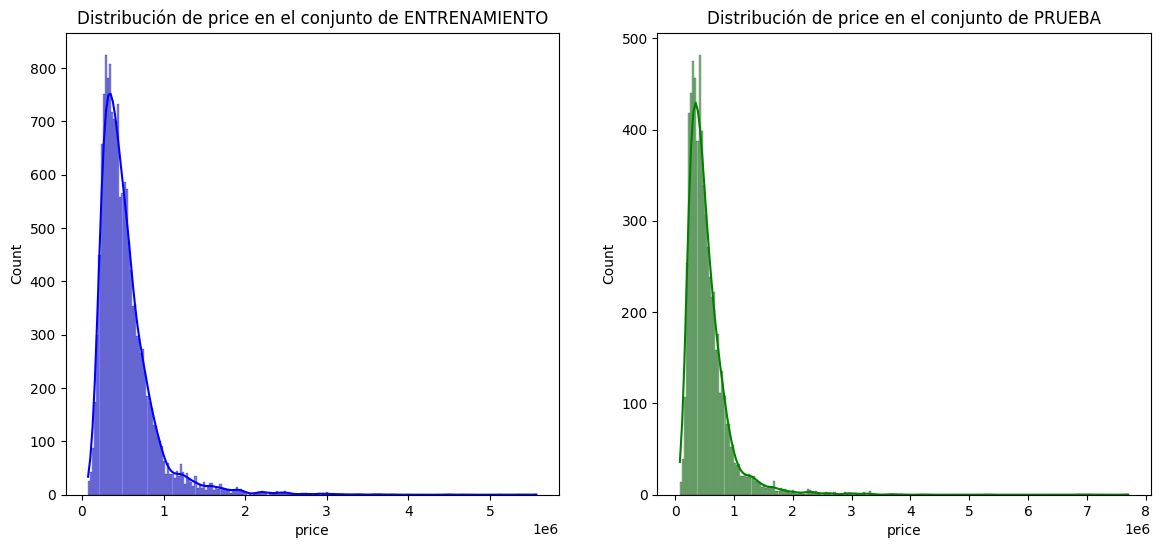

In [13]:
# ---------- HISTOGRAMAS ----------
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(y_train, kde=True, color='blue')
plt.title("Distribución de price en el conjunto de ENTRENAMIENTO")

plt.subplot(1,2,2)
sns.histplot(y_test, kde=True, color='green')
plt.title("Distribución de price en el conjunto de PRUEBA")

plt.show()


---
## <font color='264CC7'> Entrenamiento </font>

Define un modelo de regresión lineal y entrenalo con los datos de entrenamiento.

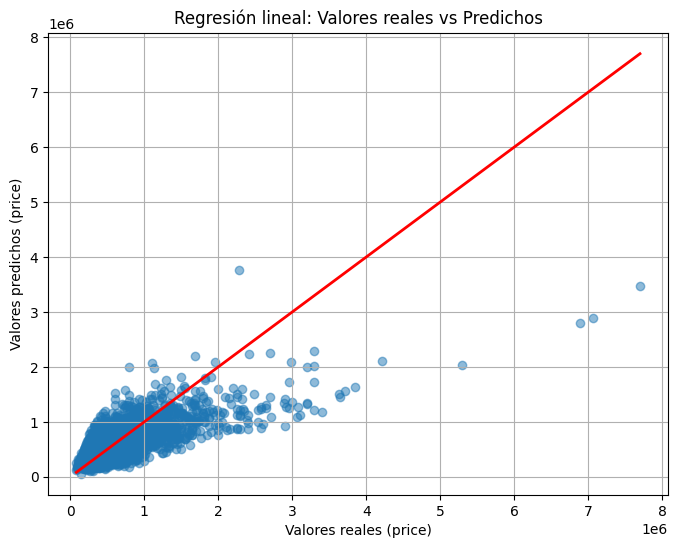

In [20]:
# Hacer predicciones con los datos de prueba
y_pred = modelo.predict(X_test)

# Crear la figura
plt.figure(figsize=(8,6))

# Puntos reales vs predichos
plt.scatter(y_test, y_pred, alpha=0.5)

# Línea de regresión (línea diagonal ideal)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)

plt.xlabel("Valores reales (price)")
plt.ylabel("Valores predichos (price)")
plt.title("Regresión lineal: Valores reales vs Predichos")
plt.grid(True)

plt.show()


---
## <font color='264CC7'> Evaluación </font>

Realiza la predicciones con el conjunto de prueba y muestra los valores en una tabla.

In [21]:
# Predicciones del modelo sobre los datos de prueba
y_pred = modelo.predict(X_test)

# Crear tabla (DataFrame)
tabla_predicciones = pd.DataFrame({
    "Precio real": y_test.values,
    "Precio predicho": y_pred
})

# Mostrar primeras filas
tabla_predicciones.head()


,Precio real,Precio predicho
0,459000.0,727565.430270
1,445000.0,424219.514631
2,1057000.0,638489.043147
3,732350.0,566971.331869
4,235000.0,356757.359519


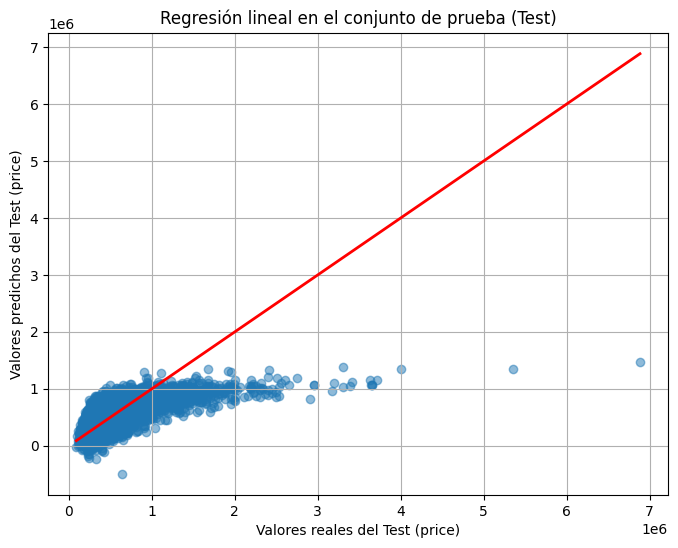

In [26]:
# Predicciones del modelo sobre el conjunto de prueba
y_pred_test = modelo.predict(X_test)

# Gráfica
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)

plt.xlabel("Valores reales del Test (price)")
plt.ylabel("Valores predichos del Test (price)")
plt.title("Regresión lineal en el conjunto de prueba (Test)")
plt.grid(True)

plt.show()

Calcula el error cuadrático medio.

In [22]:
from sklearn.metrics import mean_squared_error

# Predicciones
y_pred = modelo.predict(X_test)

# Error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)


Error Cuadrático Medio (MSE): 74968289828.18526


Escribe el error cuadrático medio para cada tipo de escalado:

- Escalado MaxAbsScaler:
- Escalado MinMaxScaler:
- Escalado RobustScaler:
- Escalado StandardScaler:
- Escalado Normalizer:
- Escalado QuantileTransformer:
- Escalado PowerTransformer:

In [24]:
# Variables
X = df[["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors"]]
y = df["price"]

# División de datos (30%)
X_train_base, X_test_base, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=7
)

# Diccionario de escaladores
scalers = {
    "MaxAbsScaler": MaxAbsScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "StandardScaler": StandardScaler(),
    "Normalizer": Normalizer(),
    "QuantileTransformer": QuantileTransformer(output_distribution="normal"),
    "PowerTransformer": PowerTransformer()
}

# Resultados MSE
resultados = {}

for nombre, scaler in scalers.items():
    # Escalar
    X_train = scaler.fit_transform(X_train_base)
    X_test = scaler.transform(X_test_base)

    # Modelo
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    # Predicción
    y_pred = modelo.predict(X_test)

    # MSE
    mse = mean_squared_error(y_test, y_pred)
    resultados[nombre] = mse

# Mostrar resultados
for nombre, mse in resultados.items():
    print(f"{nombre}: {mse}")


MaxAbsScaler: 66576966325.50027
MinMaxScaler: 66576966325.50027
RobustScaler: 66576966325.50025
StandardScaler: 66576966325.50027
Normalizer: 106463943086.8352
QuantileTransformer: 80260577214.5823
PowerTransformer: 80761056812.44322


Escribe un párrafo sobre qué hace cada escalado no visto en clase:

- **Escalado "RobustScaler":** RobustScaler es un método de normalización que utiliza la mediana y el rango intercuartílico (IQR) en lugar de la media y la desviación estándar. Esto lo hace muy resistente a valores atípicos (outliers), ya que estos no afectan de manera significativa a la mediana. El resultado es un conjunto de datos escalados donde los valores extremos tienen un impacto mucho menor, lo cual es útil en conjuntos donde existen diferencias grandes entre observaciones.

- **Escalado "Normalizer":** El Normalizer transforma cada fila del dataset para que su norma sea igual a 1. Esto significa que cada muestra se reescala individualmente, manteniendo la dirección del vector, pero cambiando su magnitud. Este tipo de escalado es más adecuado para datos donde lo importante es la orientación del vector y no su magnitud, como en problemas de texto o clustering basado en similitud de coseno, pero no suele ser ideal en problemas de regresión.

- **Escalado "QuantileTransformer":** QuantileTransformer transforma los datos para que sigan una distribución específica, normalmente una distribución uniforme o normal. Lo logra usando cuantiles, lo cual hace que los valores se distribuyan de forma más homogénea. Es un método útil cuando los datos originales presentan una fuerte asimetría o una distribución muy irregular, ya que suaviza estos patrones y produce una distribución más estable para modelos sensibles a la forma de los datos.

- **Escalado "PowerTransformer":** PowerTransformer aplica una transformación logarítmica o de Box-Cox/Yeo-Johnson para hacer que la distribución de los datos sea más “gaussiana”. Esto ayuda a estabilizar la varianza y reducir la asimetría de los datos, lo cual mejora el desempeño de modelos que suponen normalidad o linealidad. Es especialmente útil para datos muy sesgados, como los de precios, ingresos o tamaños de terreno.